In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.0 MB/s eta 0:00:00


In [2]:
import csv
import pandas as pd
import numpy as np
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm.notebook import tqdm

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

In [4]:
example = "In the report, each of the 17 goals of the SDGs is evaluated on a four-point scale: 'achieved,' 'remaining issues,' 'remaining important issues,' and 'remaining major issues.' I summarized the evaluation of Japan's achievement status in 2022 in a list. Attention should be paid to the evaluation columns for 'important issues remain' and 'major issues remain.' 'Goal 7: Affordable and clean energy' is a key issue, while 'Goal 12: Responsible consumption and production', “Goal 13: Climate action” and “Goal 14: Abundance of oceans” are serious issues. and 'Goal 15: Life on land,' all targets related to climate change and the environment have not been achieved. This is a disappointing gap, as I have felt that public interest in SDGs and environmental issues has increased in recent years. The SDGs started in 2015 and are set as goals for 2030. How much we can achieve in the second half after 2022 depends on future efforts. I would like to do my best as much as I can, not only as a company, but also as an individual."

example

"In the report, each of the 17 goals of the SDGs is evaluated on a four-point scale: 'achieved,' 'remaining issues,' 'remaining important issues,' and 'remaining major issues.' I summarized the evaluation of Japan's achievement status in 2022 in a list. Attention should be paid to the evaluation columns for 'important issues remain' and 'major issues remain.' 'Goal 7: Affordable and clean energy' is a key issue, while 'Goal 12: Responsible consumption and production', “Goal 13: Climate action” and “Goal 14: Abundance of oceans” are serious issues. and 'Goal 15: Life on land,' all targets related to climate change and the environment have not been achieved. This is a disappointing gap, as I have felt that public interest in SDGs and environmental issues has increased in recent years. The SDGs started in 2015 and are set as goals for 2030. How much we can achieve in the second half after 2022 depends on future efforts. I would like to do my best as much as I can, not only as a company, b

In [6]:
#Run on Roberta
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.32062113, 0.5029105 , 0.1764684 ], dtype=float32)

In [7]:
scores_dict = {
    'Negative' : scores[0],
    'Neutral' : scores[1],
    'Positive' : scores[2]
}

print(scores_dict)

{'Negative': 0.32062113, 'Neutral': 0.5029105, 'Positive': 0.1764684}


In [9]:
Negative_sentiment = scores_dict['Negative']
Neutral_sentiment = scores_dict['Neutral']
Positive_sentiment = scores_dict['Positive']

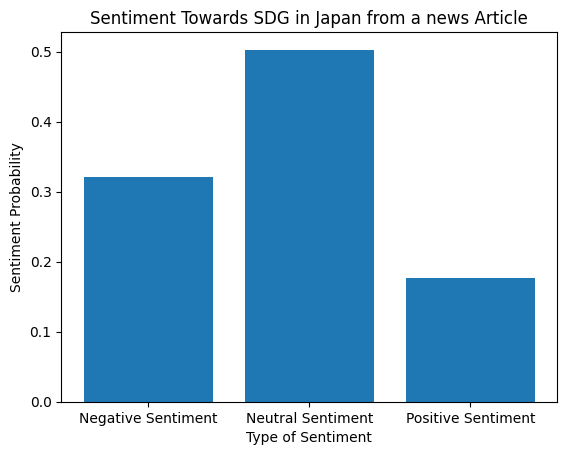

In [10]:
import matplotlib.pyplot as plt
   
sentiment_score = ['Negative Sentiment', 'Neutral Sentiment', 'Positive Sentiment']
sentiment_p = [Negative_sentiment, Neutral_sentiment, Positive_sentiment]

plt.bar(sentiment_score, sentiment_p)
plt.title('Sentiment Towards SDG in Japan from a news Article')
plt.xlabel('Type of Sentiment')
plt.ylabel('Sentiment Probability')
plt.show()

In [11]:
tokenizer2 = AutoTokenizer.from_pretrained("yiyanghkust/finbert-esg-9-categories")

model2 = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-esg-9-categories")

In [14]:
#Run on ESG
encoded_text2 = tokenizer2(example, return_tensors='pt')
output = model2(**encoded_text2)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([9.9234700e-01, 2.6443955e-03, 9.7681291e-04, 4.8422336e-04,
       1.0095556e-03, 9.5507229e-04, 8.8392448e-04, 4.2291486e-04,
       2.7600283e-04], dtype=float32)

In [15]:
scores_dict_2 = {
    'Climate Change' : scores[0],
    'Pollution & waste' : scores[1],
    'Corporate Governance' : scores[2],
    'Natural Capital' : scores[3],
    'Non-ESG' : scores[4],
    'Product Liability' : scores[5],
    'Human Capital' : scores[6],
    'Business Ethics & Value' : scores[7],
    'Community Relations' : scores[8]
}

In [19]:
print(scores_dict_2)

{'Climate Change': 0.992347, 'Pollution & waste': 0.0026443955, 'Corporate Governance': 0.0009768129, 'Natural Capital': 0.00048422336, 'Non-ESG': 0.0010095556, 'Product Liability': 0.0009550723, 'Human Capital': 0.0008839245, 'Business Ethics & Value': 0.00042291486, 'Community Relations': 0.00027600283}


In [17]:
climate_change = scores_dict_2['Climate Change']
pollution_and_waste = scores_dict_2['Pollution & waste']
corporate_governance = scores_dict_2['Corporate Governance']
natural_capital = scores_dict_2['Natural Capital']
non_esg = scores_dict_2['Non-ESG']
product_liability = scores_dict_2['Product Liability']
human_capital = scores_dict_2['Human Capital']
business_ethics_value = scores_dict_2['Business Ethics & Value']
community_relations = scores_dict_2['Community Relations']


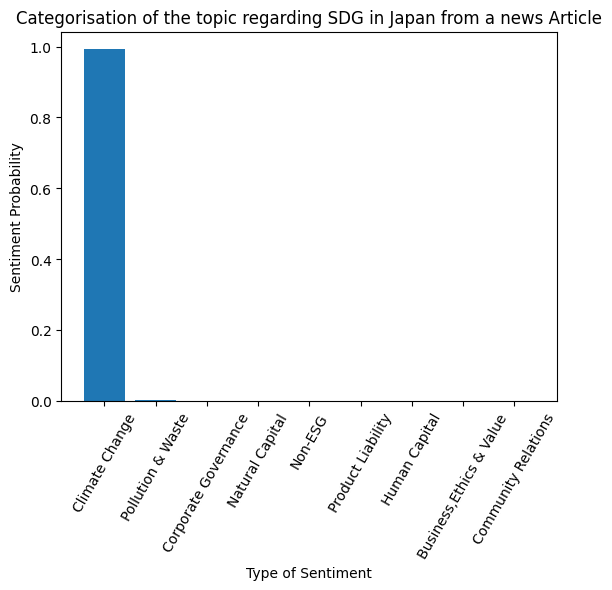

In [21]:
subject_score = ['Climate Change', 'Pollution & Waste', 'Corporate Governance', 'Natural Capital', 'Non-ESG', 'Product Liability', 'Human Capital', 'Business,Ethics & Value', 'Community Relations']
subject_p = [climate_change, pollution_and_waste, corporate_governance, natural_capital, non_esg, product_liability, human_capital, business_ethics_value, community_relations]

plt.bar(subject_score, subject_p)
plt.title('Categorisation of the topic regarding SDG in Japan from a news Article')
plt.xlabel('Type of Sentiment')
plt.ylabel('Sentiment Probability')
plt.xticks(rotation=60)
plt.show()

In [31]:
example_2 = "In April 2016, the Act on Promotion of Women's Participation and Advancement in the Workplace was enacted, and in order to improve the environment for women's work life, it was obliged to publish surveys and analysis of issues regarding the status of women's advancement. By distributing 'Children's Human Rights SOS Mini Letters' (letter paper and envelopes) to elementary and junior high school children and students nationwide, we can help solve human rights issues by understanding even the concerns of children that cannot be told to teachers or parents. ing. In July 2018, the 'Basic Policy for Homeless Self-Reliance Support, etc.' was formulated, and it is working on human rights enlightenment, consultation, and investigation and relief activities."

example_2

"In April 2016, the Act on Promotion of Women's Participation and Advancement in the Workplace was enacted, and in order to improve the environment for women's work life, it was obliged to publish surveys and analysis of issues regarding the status of women's advancement. By distributing 'Children's Human Rights SOS Mini Letters' (letter paper and envelopes) to elementary and junior high school children and students nationwide, we can help solve human rights issues by understanding even the concerns of children that cannot be told to teachers or parents. ing. In July 2018, the 'Basic Policy for Homeless Self-Reliance Support, etc.' was formulated, and it is working on human rights enlightenment, consultation, and investigation and relief activities."

In [32]:
#Run on Example2
encoded_text = tokenizer(example_2, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.02863319, 0.5611823 , 0.41018447], dtype=float32)

In [33]:
scores_dict = {
    'Negative' : scores[0],
    'Neutral' : scores[1],
    'Positive' : scores[2]
}

print(scores_dict)

{'Negative': 0.028633194, 'Neutral': 0.5611823, 'Positive': 0.41018447}


In [34]:
Negative_sentiment = scores_dict['Negative']
Neutral_sentiment = scores_dict['Neutral']
Positive_sentiment = scores_dict['Positive']

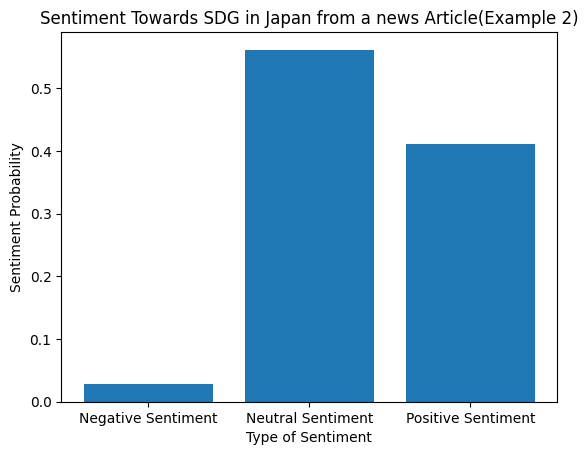

In [35]:
sentiment_score = ['Negative Sentiment', 'Neutral Sentiment', 'Positive Sentiment']
sentiment_p = [Negative_sentiment, Neutral_sentiment, Positive_sentiment]

plt.bar(sentiment_score, sentiment_p)
plt.title('Sentiment Towards SDG in Japan from a news Article(Example 2)')
plt.xlabel('Type of Sentiment')
plt.ylabel('Sentiment Probability')
plt.show()

In [36]:
#Run on ESG (Example 2)
encoded_text2 = tokenizer2(example_2, return_tensors='pt')
output = model2(**encoded_text2)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([8.6023123e-04, 1.6376242e-03, 1.3806680e-03, 8.8502967e-01,
       2.1712261e-03, 1.0355501e-01, 8.0606958e-04, 3.5064209e-03,
       1.0529816e-03], dtype=float32)

In [46]:
scores_dict_2 = {
    'Climate Change' : scores[0],
    'Pollution & waste' : scores[1],
    'Corporate Governance' : scores[2],
    'Human Capital' : scores[3],
    'Non-ESG' : scores[4],
    'Product Liability' : scores[5],
    'Natural Capital' : scores[6],
    'Business Ethics & Value' : scores[7],
    'Community Relations' : scores[8]
}

In [41]:
print(scores_dict_2)

{'Climate Change': 0.00086023123, 'Pollution & waste': 0.0016376242, 'Corporate Governance': 0.001380668, 'Natural Capital': 0.8850297, 'Non-ESG': 0.002171226, 'Product Liability': 0.10355501, 'Human Capital': 0.0008060696, 'Business Ethics & Value': 0.0035064209, 'Community Relations': 0.0010529816}


In [47]:
climate_change = scores_dict_2['Climate Change']
pollution_and_waste = scores_dict_2['Pollution & waste']
corporate_governance = scores_dict_2['Corporate Governance']
human_capital = scores_dict_2['Human Capital']
non_esg = scores_dict_2['Non-ESG']
product_liability = scores_dict_2['Product Liability']
natural_capital = scores_dict_2['Natural Capital']
business_ethics_value = scores_dict_2['Business Ethics & Value']
community_relations = scores_dict_2['Community Relations']

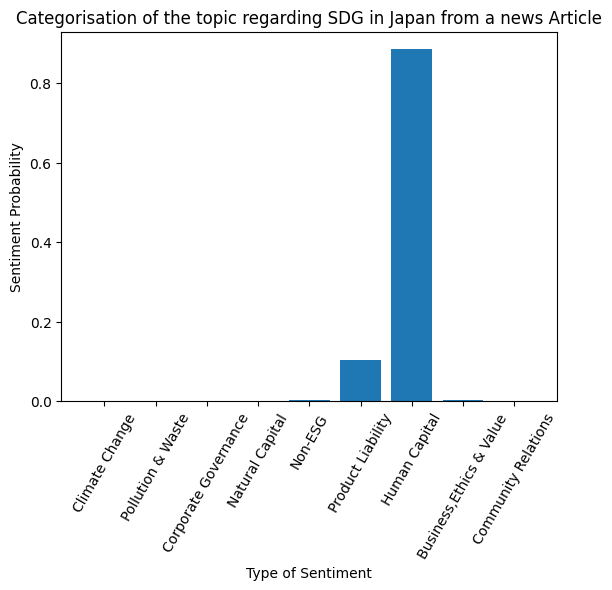

In [48]:
subject_score = ['Climate Change', 'Pollution & Waste', 'Corporate Governance', 'Natural Capital', 'Non-ESG', 'Product Liability', 'Human Capital', 'Business,Ethics & Value', 'Community Relations']
subject_p = [climate_change, pollution_and_waste, corporate_governance, natural_capital, non_esg, product_liability, human_capital, business_ethics_value, community_relations]

plt.bar(subject_score, subject_p)
plt.title('Categorisation of the topic regarding SDG in Japan from a news Article')
plt.xlabel('Type of Sentiment')
plt.ylabel('Sentiment Probability')
plt.xticks(rotation=60)
plt.show()